![logo](../../LogoLine_horizon_C3S.png)

<div class="alert alert-block alert-warning">
Please note that this repository is used for development and review, so quality assessments should be considered work in progress until they are merged into the main branch
</div>

# A seasonal forecasting system's skill in predicting upper ocean heat content extremes

Production date: DD-11-2025

Produced by: Helene B. Erlandsen (METNorway)

## 🌍 Use case: 
The potential for predicting upper ocean heat content extremes in seasonal forecasts.

## ❓ Quality assessment question
* **What is the forecast skill of the seasonal prediction system in detecting extreme upper ocean heat content events (above the 90th percentile) at 1-3 months leadtimes?**


This notebook evaluates the skill of the Météo-France System-9 seasonal forecasting system in predicting upper ocean heat content extremes. The analysis uses:
- **Seasonal Forecast Data**: Monthly depth-averaged potential temperature for the upper 300 m, from Météo-France System-9 forecasts. [[doi:10.24381/cds.2f9be611]](https://doi.org/10.24381/cds.2f9be611)
- **Reanalysis Data**: Ocean heat content from the ORAS5 global ocean and sea-ice reanalysis dataset. [[doi:10.24381/cds.67e8eeb7]](https://doi.org/10.24381/cds.67e8eeb7)

We assess skill at lead times of 1–3 months using metrics such as the Symmetric Extremal Dependence Index (SEDI) and the Brier Skill Score (BSS). The metrics considered follow  Jacox et. al. 2022, [[1]](https://doi.org/10.1038/s41586-022-04573-9), however in this work we look at upper ocean heat content and not sea surface temperature. Since ocean heat content (OHC) anomalies may persist for several months, this variable is an important component of seasonal predictability, containing relevant information even at a monthly time-scale (McAdam et. al. 2022, [[2]](https://doi.org/10.1007/S00382-021-06101-3)). We consider the forecasts initialized around October 1st between 1993 and 2023.

## 📢 Quality assessment statement
```{admonition} These are the key outcomes of this assessment
:class: note

- The Météo-France System-9 forecast model demonstrates skill in detecting the risk of NDJ (November-January) upper ocean heatwaves. For November, the system correctly anticipates approximately one-third (33%) of observed heatwave events.
- The forecast is useful for identifying broad, large-scale patterns of risk, particularly during major El Niño events. However, the Brier Skill Score (BSS) highlights that its probabilistic reliability varies by region. Using a multi-model forecast ensemble would likely increase the spread of the forecasts and provide more reliable results outside the ENSO region.
- The skill demonstrated under these challenging conditions represents a strong foundation. The system has potential as a tool for anticipating and building resilience to marine heatwaves, especially in ENSO-sensitive regions.

```{figure} 0fa94a15-3175-4725-863a-fc42e5bcb6c5.png
---
height: 600px
---
Figure 1: Spatial Forecast Skill for November-December-January (NDJ) Upper Ocean Heatwaves (1993–2023).
Skill of Météo-France System-9 forecasts (initialized October 1st) verified against ORAS5 reanalysis. Heatwaves are defined as upper 300m ocean heat content (OHC) anomalies exceeding the 90th percentile within the 1993-2023 period. Rows show: (A) Symmetric Extremal Dependence Index (SEDI), (B) Brier Skill Score (BSS); and (C) Accuracy. In all maps, red areas indicate positive skill (forecast is better than the reference), while blue areas indicate negative skill.

```

## 📋 Methodology

The following steps were applied to evaluate the skill of the seasonal forecasting system in predicting heatwave extremes:

[](seasonal_seasonal-monthly-ocean_extremes-detection_q07:seasonal_ohc:section-1)

This section includes:
- imports, settings, parameter definitions, and reusable functions required to initialize the analysis. The data is loaded here.
 
- **Météo-France System-9**: The seasonal forecast data includes monthly depth-averaged potential temperature for the upper 300m, initialized on October 1st each year. For consistency only the hindcast period is used (1993 - 2024), since the model system has a lower number of ensemble members in the forecast period compared to the hindcast period.
    - Météo-France System-9 *depth_average_potential_temperature_of_upper_300m* ($\bar{\Theta}$) was converted to OHC using the similar constants as used by ORAS5 (pers. comm.):
$\text{OHC} =\rho \, c_p \, \bar{ \Theta} \, dz $, where  $ \rho = 1026 \, \text{kg/m}^3$, $ c_p = 3991 \, \text{J/kg/K} $, and  $ dz = 300 \, \text{m} $. 
- **ORAS5**: Reanalysis OHC for the upper 300m is used as the observational reference. Data is regridded to a common 1° spatial resolution using conservative normalization in xESMF.

- The seasonal forecast and reanalysis data were processed for the period from **1993 to 2023**; and we consider forecasts **initialized in October, valid for November, December, and January**, i.e. with **lead times of one to three months**. For instance, the last season considers forecasts initialized around October 1st 2023 for November and December 2023 and January 2024. **Anomalies**: Monthly anomalies are calculated by subtracting the calendar month climatology.

  
- The reanalysis data was gathered and processed similarly for the same months.

- We also apply a common land mask to the interpolated products, also omitting areas where at any time the seasonal forecasts has temperatures below 0°C (we could have used a lower threshold than 0°C, but use this threshold as it at least will mask out all ice covered areas).

[](seasonal_seasonal-monthly-ocean_extremes-detection_q07:seasonal_ohc:section-2)

- We compare the data in map plots and in area aggregated time-series plots. Initial inspection showed strong temporal trends in OHC during the time period. The linear trends were removed from the raw data, so that the trends would not inflate the skill scores, as the trends may be updated with forecast initialization. Further, the strong temporal trends would skew the diagnosis of heatwaves to primarily occur in the more recent years.

[](seasonal_seasonal-monthly-ocean_extremes-detection_q07:seasonal_ohc:section-3)

The OHC anomalies based on detrended data was used to assess heatwaves. To avoid unrealistic jumps, and to align our analysis with Jacox et. al. 2022, [[1]](https://doi.org/10.1038/s41586-022-04573-9) we use a three-month rolling window to set the monthly heatwave thresholds. **Heatwaves** are defined as anomalies exceeding the 90th percentile threshold of the anomalies, and we find this threshold by also considering anomalies in the month prior to and proceeding the month in question, thus the November thresholds are found from the October, November, and December anomalies. 

  
In the subsequent sections we evaluate the forecast over different dimensions:

### Pooling and grouping strategies

| Analysis Goal	| Grouping Strategy	| Question It Answers |
|---------------|-------------------|---------------------| 
 | Skill Maps | Pool time and ensemble for each grid point.	| "What is the forecast skill at this specific location over the entire 30-year period?"|
| Annual Time Series |	Pooled horizontally and over the ensemble for each year. |	"What was the overall global forecast skill in the year 1997?"|
| Summary Tables |	Pool time, space, and ensemble for each lead-time (month). |	"What was the overall global forecast skill for all Novembers combined in the record?" |


[](seasonal_seasonal-monthly-ocean_extremes-detection_q07:seasonal_ohc:section-4)

We evaluate the forecasting system using the metrics outlined below.

### SEDI -  the Symmetric Extremal Dependence Index

SEDI quantifies the forecast skill for rare binary events (e.g., heatwaves). It is the Symmetric Extremal Dependence Index (Ferro & Stephenson 2011 [[3]](https://doi.org/10.1175/WAF-D-10-05030.1)). SEDI has a maximum value of one, and a minimum value of -1. Scores above zero indicate a forecast better than random chance.

SEDI is built on the output of a contingency table. A contingency table provides:  sample size, n; base rate, p; hit rate, H; and false-alarm rate, F. The ensemble members are pooled and each adds to the counts in the contingency table before the SEDI score is calculated.
 
 |                     | Event observed | Non-event observed |       |
 |     ---             | ---            | ---                | ---   |             
 |Event forecasted     | a = Hpn        | b = F(1-p)n        | a + b | 
 |Non-event forecasted | c = (1-H)pn    | d = (1-F)(1-p)n    | c + d |
 |Sum                  | a + c = pn     | b + d = (1-p)n     | n     |
 
 Hit rate (H) =  $ \frac{a}{a+c} $, False alarm rate (F) =  $ \frac{b}{b+d} $
 
 SEDI =  $ \frac{logF - logH  -log(1-F) + log(1-H)}{logF + logH  +log(1-F) + log(1-H)} $

### The Brier Skill Score (BSS)

The Brier Skill Score (BSS) compares the forecast skill against a reference forecast (e.g., climatology), which for heatwaves defined as values above 90% of those observed, would be that there always was about a 10% chance of a heatwave. 

It is calculated as:
  $
  \text{BSS} = 1 - \frac{\text{Brier Score (BrS)}}{\text{BrS}_{\text{ref}}}
  $

It is based on the Brier Score, which measures the mean squared error between forecast probabilities and observed binary events. 

The BSS's upper limit is 1, meanwhile it has no lower limit. Scores above zero indicate a forecast better than the climatology, which is around a 10% chance.

### Accuracy

Accuracy measures the proportion of correct predictions (both true positives and true negatives) out of the total number of forecasts made. The formula is:

$ \text{Accuracy} = \frac{\text{True Positives (TP)} + \text{True Negatives (TN)}}{\text{Total Predictions (N)}} $

For rare events like heatwaves (which occur about 10 % of the time in this study), a simple accuracy score can be misleading. A forecast that always predicts "no heatwave" would be 90 % accurate but have zero skill. Therefore, we compare the forecast's accuracy to a random chance benchmark. For an event with a 10% probability (p=0.1), the accuracy of a random forecast is calculated as:

$ \text{Random Accuracy}  =  p^2+(1−p)^2 = 0.1^2+(0.9)^2 = 0.82 $

This means the forecasting system must achieve an accuracy greater than 0.82 (or 82%) to be considered more skillful than random chance.


[](seasonal_seasonal-monthly-ocean_extremes-detection_q07:seasonal_ohc:section-5)
The contingency tables for all November, December, and January's are presented and discussed.

[](seasonal_seasonal-monthly-ocean_extremes-detection_q07:seasonal_ohc:section-6)
Finally, we display the annual metrics as time-series, also showing the components of the contingency table, allowing a discussion of the components of the metrics.

[](seasonal_seasonal-monthly-ocean_extremes-detection_q07:seasonal_ohc:section-7)

## 📈 Analysis and results
(seasonal_seasonal-monthly-ocean_extremes-detection_q07:seasonal_ohc:section-1)= 
### 1. Data Preparation
This section includes imports, settings, parameter definitions, and reusable functions required to initialize the analysis. 

#### i) Imports and Settings    

In [1]:
# ### i) Imports and Settings
import matplotlib.pyplot as plt
from matplotlib.patches import Patch 
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
from c3s_eqc_automatic_quality_control import diagnostics, download
import xskillscore as xs
import cartopy
import cartopy.crs as ccrs
import warnings, os
import gc
import pooch
from dask import compute as dask_compute

warnings.simplefilter("ignore", category=FutureWarning)
plt.style.use("seaborn-v0_8-notebook")

#### ii) Definition of Parameters

We have chosen Meteo-France System-9, and focus on the hindcast period, which are available from 1993 until 2024, to have a consistent ensemble throughout the analysis. 

We focus on the forecasts initiated October 1st every year, and consider one, two, and three months leadtimes - i.e. the forecasted values for November, December, and January. In the initial processing also October and February values are used, as the heatwave thresholds are centered a three-month month moving window.

In [2]:
# Select realizations for ensemble
realizations = slice(None, None)

# Whether to detrend anomalies or not
detrend = False

# Analysis time period
start = "1993-10"
stop = "2023-10"
freq = "12MS"  # Monthly frequency
leadtimes = [0, 1, 2, 3, 4]  # Lead times in months, 10, 11, 12, 1, 2
months_to_do = [11, 12, 1] #NDJ

# Use all realizations for ensemble
realizations = slice(None, None)

#Various parameters
eps = 1e-12 
spatial_chunks = {'latitude': 32, 'longitude': 64} 
time_chunks = {'year': -1, 'month': -1}# -1 is no/one chunk
reduce_dims = ['year', 'realization'] 
Nino_3_4_lat = [-5,5]
Nino_3_4_lon = [360-170,360-120] #W
nino_box = dict(longitude=slice(Nino_3_4_lon[0], Nino_3_4_lon[1]), latitude = slice(Nino_3_4_lat[0], Nino_3_4_lat[1]))

# Physical constants for ocean heat content calculations as used in ORAS5
cp = 3991.  # J/kg/K (specific heat of seawater)
rho0 = 1026.  # kg/m^3 (reference density of seawater)
delta_level = 300  # m (upper ocean depth)

# Conversion factor for heat content (J/m^2)
#delta_level * cp * rho0 * (Seasonal_data - Tf)
heat_content_factor = cp * rho0 * delta_level

#### iii) Helper Functions for Data Processing and Plotting

In [3]:
# map plot helper
def setup_map_plot(ax):
    """
    Applies consistent styling to a Cartopy map axes.
    - Sets the ocean color to gray.
    - Adds land, coastlines, and borders.
    """
    ax.set_facecolor('gray')
    ax.add_feature(cartopy.feature.LAND, facecolor='lightgrey', zorder=2)
    ax.add_feature(cartopy.feature.COASTLINE, linewidth=0.5, zorder=3)
    ax.add_feature(cartopy.feature.BORDERS, linewidth=0.5, zorder=3)
    ax.plot([Nino_3_4_lon[0],Nino_3_4_lon[0],Nino_3_4_lon[1],Nino_3_4_lon[1],Nino_3_4_lon[0]],
                [Nino_3_4_lat[0],Nino_3_4_lat[1],Nino_3_4_lat[1],Nino_3_4_lat[0],Nino_3_4_lat[0]], 
            c='k',transform=ccrs.PlateCarree()) 
    
    
def add_bounds(ds):
    # From https://github.com/COSIMA/ocean-regrid/blob/master/nemo_grid.py
    url = (
        "https://icdc.cen.uni-hamburg.de/thredds/fileServer/ftpthredds/"
        "EASYInit/oras5/ORCA025/mesh/mesh_mask.nc"
    )
    known_hash = "ba88418bc8055972b675ceedbd4345b3827f0ede8cef04d53c97b66a5c7a46a7"
    fname = pooch.retrieve(url, known_hash)
    dg = xr.open_dataset(fname, chunks={}).isel(t=0, z=0)

    # These are the top righ-hand corner of t cells.
    glamf = dg.glamf
    gphif = dg.gphif

    # Extend south so that Southern most cells can have bottom corners.
    gphif_new = np.ndarray((gphif.shape[0] + 1, gphif.shape[1] + 1))
    gphif_new[1:, 1:] = gphif[:]
    gphif_new[0, 1:] = gphif[0, :] - abs(gphif[1, :] - gphif[0, :])

    glamf_new = np.ndarray((glamf.shape[0] + 1, glamf.shape[1] + 1))
    glamf_new[1:, 1:] = glamf[:]
    glamf_new[0, 1:] = glamf[0, :]

    # Repeat first longitude so that Western most cells have left corners.
    gphif_new[:, 0] = gphif_new[:, -1]
    glamf_new[:, 0] = glamf_new[:, -1]

    gphif = gphif_new
    glamf = glamf_new

    # Corners of t points. Index 0 is bottom left and then
    # anti-clockwise.
    clon = np.empty((dg.tmask.shape[0], dg.tmask.shape[1], 4))
    clon[:] = np.nan
    clon[:, :, 0] = glamf[0:-1, 0:-1]
    clon[:, :, 1] = glamf[0:-1, 1:]
    clon[:, :, 2] = glamf[1:, 1:]
    clon[:, :, 3] = glamf[1:, 0:-1]
    assert not np.isnan(np.sum(clon))

    clat = np.empty((dg.tmask.shape[0], dg.tmask.shape[1], 4))
    clat[:] = np.nan
    clat[:, :, 0] = gphif[0:-1, 0:-1]
    clat[:, :, 1] = gphif[0:-1, 1:]
    clat[:, :, 2] = gphif[1:, 1:]
    clat[:, :, 3] = gphif[1:, 0:-1]
    assert not np.isnan(np.sum(clat))

    ds["latitude"].attrs["bounds"] = "latitude_bounds"
    ds["longitude"].attrs["bounds"] = "longitude_bounds"
    return ds.assign_coords(
        latitude_bounds=(["y", "x", "bound"], clat),
        longitude_bounds=(["y", "x", "bound"], clon),
    )


# Seasonal

def preprocess_seasonal(ds):
    """
    New preprocessing function:
    1. Swaps 'leadtime' dimension for 'time' coordinate.
    2. Cleans up metadata (bnds, realization).
    """
    
    # Check if 'leadtime' is a dim, 'time' is a coord, 
    # and 'time' is indexed by 'leadtime'.
    if 'leadtime' in ds.dims and 'time' in ds.coords and 'leadtime' in ds['time'].dims:
        ds = ds.swap_dims({'leadtime': 'time'})

    # Set 'bnds' variables as coordinates
    bnd_vars = [var for var, da in ds.data_vars.items() if "bnds" in da.dims]
    if bnd_vars:
        ds = ds.set_coords(bnd_vars)
        
    # Clean up 'realization' coordinate and ensure it's a dimension
    if 'realization' in ds.coords:
        ds["realization"] = ds["realization"].str.replace(" ", "").astype(str)
        if 'realization' not in ds.dims:
            ds = ds.expand_dims("realization")
            
    return ds

    
def regrid_reanalysis(ds, grid_request, **xesmf_kwargs):
    ds_seasonal = download.download_and_transform(
        *grid_request,
        preprocess=preprocess_seasonal,
        invalidate_cache=False,
        decode_timedelta=False,
    )
    mask_out = (
        ds_seasonal["thetaot300"]
        .isel(
            {dim: 0 for dim in ("realization", "time")}
        )
        .reset_coords(drop=True)
        .notnull()
    )
    grid_out = ds_seasonal.cf[["latitude", "longitude"]].assign_coords(mask=mask_out)

    mask_in = ds["sohtc300"].isel(time=0).reset_coords(drop=True).notnull()
    ds = add_bounds(ds).assign_coords(mask=mask_in)
    return diagnostics.regrid(ds, grid_out, **xesmf_kwargs)
    
def compute_anomalies_new(ds, realizations, grid_request, detrend, **xesmf_kwargs):
    """
    Computes standard monthly anomalies and detrends them 
    month-by-month using a mean-preserving method.
    """
    if realizations is not None:
        ds = ds.isel(realization=realizations)

    if grid_request is not None:
        ds = regrid_reanalysis(ds, grid_request, **xesmf_kwargs)
    else:
        assert not xesmf_kwargs

    ((name, da),) = ds.data_vars.items()
    time_dim = "time"
    
    with xr.set_options(keep_attrs=True):
        
        # --- Standard Monthly Climatology ---
        dims_to_mean = [time_dim]
        if "realization" in da.dims:
            dims_to_mean.append("realization")

        # Calculate mean for each month (Jan, Feb, etc.)
        climatology = da.groupby(f"{time_dim}.month").mean(dim=dims_to_mean)
        
        # Calculate Anomalies
        anomalies = da.groupby(f"{time_dim}.month") - climatology
        
        # --- Month-by-Month Detrending ---
        if detrend:
            # 1. Group by month and fit trend using .map()
            pf_ds = anomalies.groupby(f"{time_dim}.month").map(
                lambda x: x.polyfit(dim=time_dim, deg=1)
            )
            
            # Extract the coefficients DataArray. 
            coeff_name = list(pf_ds.data_vars)[0]
            coeffs = pf_ds[coeff_name]
            
            # Reconstruct the full trend line (mx + c)
            coeffs_expanded = coeffs.sel(month=anomalies[time_dim].dt.month)
            full_trend = xr.polyval(anomalies[time_dim], coeffs_expanded)
            
            # Isolate the slope component.
            slope_component = full_trend - full_trend.mean(dim=time_dim)
            
            # Subtract the slope
            anomalies = anomalies - slope_component

    anomalies.encoding["chunksizes"] = tuple(
        1 if dim == "realization" else size
        for dim, size in anomalies.sizes.items()
    )
    return anomalies.to_dataset(name=name)
    
    
def transform_seasonal_data(ds, realizations, detrend, grid_request, **xesmf_kwargs):
    """
    1. Compute the anomalies
    2. Reindexe the data using reindex_seasonal.
    """
    static_not_sea_ice_proxy_mask_s = (
    (ds['thetaot300'] > 273.15) # 
    .all(dim=['time', 'realization']) # 
    )
    static_not_sea_ice_proxy_mask_s = static_not_sea_ice_proxy_mask_s.compute()

    #print(f"Number of 'True' points in sesonal static_sea_ice_proxy_mask: {static_not_sea_ice_proxy_mask_s.sum().compute().item()}")
    #static_not_sea_ice_proxy_mask_s.plot()
    # Step 1: Compute anomalies
    ds_anom = compute_anomalies_new(
        ds,
        realizations=realizations,
        detrend=detrend,
        grid_request=grid_request,
        **xesmf_kwargs
    )
    #apply the mask here
    xr.set_options(keep_attrs=True)
    ds_anom['thetaot300'] = ds_anom['thetaot300'].where(static_not_sea_ice_proxy_mask_s)

    ds_anom = ds_anom.load()
    # --------------------------

    # Step 2: Reindex to (year, month), assing year to fc_start
    ds_reindexed = reindex_seasonal(
        ds_anom, 
        time_dim='time', 
        shift_months=[1, 2, 3, 4] 
    )
    
    return ds_reindexed

def transform_reanalysis_data(ds, realizations, detrend, grid_request, **xesmf_kwargs):
    """
    Wrapper function to process reanalysis data:
    1. Compute anomalies 
    2. Reindexe the data using a fixed seasonal function.
    """

    # Step 1: Compute anomalies
    ds_anom = compute_anomalies_new(  
        ds,
        realizations=realizations,
        detrend=detrend,
        grid_request=grid_request,
        **xesmf_kwargs
    )

    ds_anom = ds_anom.load() 
    # --------------------------

    months_to_shift = [1, 2, 3, 4] 
    ds_reindexed = reindex_seasonal(
        ds_anom, 
        time_dim='time', 
        shift_months=months_to_shift 
    )
    
    return ds_reindexed

    

def reindex_seasonal(ds, time_dim='time', shift_months=[1, 2, 3, 4]):
    """
    Reindexes to (year, month) by shifting specified months.
    Assign all the fc months to the initialization year
    """
    calendar_year = ds[time_dim].dt.year
    calendar_month = ds[time_dim].dt.month
    
    # Create the 'season_year'
    season_year = xr.where(
        calendar_month.isin(shift_months),
        calendar_year - 1,
        calendar_year
    )
    
    ds = ds.assign_coords(
        season_year=('time', season_year.data), 
        month=('time', calendar_month.data)
    )
    
    ds = ds.set_index(time=("season_year", "month")).unstack("time")
    ds = ds.rename({'season_year': 'year'})
    
    # the month coord will be [1, 2, 3, 4, 10, 11, 12]
    return ds

#### iv) Data Loading
We download the reanalysis and seasonal forecast datasets, regridding the reanalysis data to align with the seasonal forecast grid, and computing the detrended anomalies. 
These transformations are performed using the *c3s_eqc_automatic_quality_control* *download.download_and_transform* function and custom preprocessing steps.
 - The data is combined and reindexed so that year and calendar month are the dataset coordinates.
 - The long-term climatology and possibly the monthly trend is subtracted.
 - We apply a common land mask and also mask out areas where seasonal forecast data have values corresponding to a monthly mean potential temperature below 0°C.
 - The seasonal forecast vertically integrated potential temperature is converted to OHC, following the convention used in ORAS5. 
 - The variable names are changed to reflect their current state.

In [4]:
collection_id_reanalysis = "reanalysis-oras5"
collection_id_seasonal = "seasonal-monthly-ocean"

#requests_reanalysis = {leadtime: [] for leadtime in leadtimes}
requests_seasonal = []
for date in pd.date_range(start, stop, freq=freq):
    requests_seasonal.append(
        {
            "originating_centre": "meteo_france",
            "system": "9",
            "variable": ["depth_average_potential_temperature_of_upper_300m"],
            "forecast_type": ["hindcast"],
            "year": date.strftime("%Y"),
            "month": date.strftime("%m"),
        }
    )


print("Building a flat list of unique reanalysis requests...")
requests_reanalysis_flat = []
seen_requests = set() # To prevent duplicate requests

for date in pd.date_range(start, stop, freq=freq):
    for leadtime in leadtimes:
        date_reanalysis = date + pd.DateOffset(months=leadtime)
        request = {
            "product_type": [
                "operational" if date_reanalysis.year > 2014 else "consolidated"
            ],
            "vertical_resolution": "single_level",
            "variable": ["ocean_heat_content_for_the_upper_300m"],
            "year": date_reanalysis.strftime("%Y"),
            "month": date_reanalysis.strftime("%m"),
        }
        request_key = (request["year"], request["month"])
        if request_key not in seen_requests:
            requests_reanalysis_flat.append(request)
            seen_requests.add(request_key)

print(f"Found {len(requests_reanalysis_flat)} unique months of reanalysis to download.")

# Seasonal
ds_seasonal_trend = download.download_and_transform(
    collection_id_seasonal,
    requests_seasonal,
    preprocess=preprocess_seasonal,
    drop_variables="hcrs",
    transform_func=transform_seasonal_data,
    invalidate_cache=False,
    transform_func_kwargs={
        "realizations": realizations,
        "detrend": False,
        "grid_request": None,
    },
    transform_chunks=False,
    decode_timedelta=False,
)
ds_seasonal_trend = ds_seasonal_trend.chunk({
    'year': -1, 
    'month': -1, 
    'realization': 1  
}).astype(np.float32)

# Seasonal
ds_seasonal = download.download_and_transform(
    collection_id_seasonal,
    requests_seasonal,
    preprocess=preprocess_seasonal,
    drop_variables="hcrs",
    transform_func=transform_seasonal_data,
    invalidate_cache=False,
    transform_func_kwargs={
        "realizations": realizations,
        "detrend": True,
        "grid_request": None,
    },
    transform_chunks=False,
    decode_timedelta=False,
)

ds_seasonal = ds_seasonal.chunk({
    'year': -1, 
    'month': -1, 
    'realization': 1 
}).astype(np.float32)


# Reanalysis
ds_reanalysis_trend = download.download_and_transform(
    collection_id_reanalysis,
    requests_reanalysis_flat,  
    transform_func=transform_reanalysis_data, 
    invalidate_cache=False,
    drop_variables="time_counter_bnds",
    transform_func_kwargs={
        "realizations": None,  
        "detrend": False,
        "grid_request": (collection_id_seasonal, requests_seasonal[0]),
        "method": "conservative_normed",
        "periodic": True,
        "ignore_degenerate": True,
    },
    transform_chunks=False,
)

ds_reanalysis_trend = ds_reanalysis_trend.chunk({'year': -1, 'month': -1}).astype(np.float32)

ds_reanalysis = download.download_and_transform(
    collection_id_reanalysis,
    requests_reanalysis_flat,  
    transform_func=transform_reanalysis_data, 
    invalidate_cache=False,
    drop_variables="time_counter_bnds",
    transform_func_kwargs={
        "realizations": None, 
        "detrend": True,
        "grid_request": (collection_id_seasonal, requests_seasonal[0]),
        "method": "conservative_normed",
        "periodic": True,
        "ignore_degenerate": True,
    },
    transform_chunks=False,
)
ds_reanalysis = ds_reanalysis.chunk({'year': -1, 'month': -1}).astype(np.float32)

# post processing: conversion and applying the common mask 
# (the seas fc has an additional mask now, removing cold areas, 
# computed before converted to anomalies )
mask1 = ds_reanalysis['sohtc300'].isel(month=1, year=1).isnull()
mask2 = ds_seasonal['thetaot300'].isel(month=1, year=1, realization=0).isnull()

landice_mask=mask1.where((mask1<1) & (mask2 <1) )+1

comask = landice_mask.compute()

# convert the seasonal values to potential temperature expressed as OHC
ds_seasonal = ds_seasonal * heat_content_factor
ds_seasonal_trend = ds_seasonal_trend * heat_content_factor
# reaname the variables

ds_seasonal = ds_seasonal.rename({'thetaot300': 'sohtc300_anomalies'})
ds_reanalysis_trend = ds_reanalysis_trend.astype(np.float32)
ds_seasonal_trend = ds_seasonal_trend.rename({'thetaot300': 'sohtc300_anomalies'})
ds_reanalysis = ds_reanalysis.rename({'sohtc300': 'sohtc300_anomalies'})
ds_reanalysis_trend = ds_reanalysis_trend.rename({'sohtc300': 'sohtc300_anomalies'})

#add inn the common mask again, also using an ice-proxy from the seasonal fc data
xr.set_options(keep_attrs=True)
ds_seasonal['sohtc300_anomalies'] = ds_seasonal['sohtc300_anomalies']*comask
ds_seasonal_trend['sohtc300_anomalies'] = ds_seasonal_trend['sohtc300_anomalies']*comask
ds_reanalysis['sohtc300_anomalies'] = ds_reanalysis['sohtc300_anomalies']*comask
ds_reanalysis_trend['sohtc300_anomalies'] = ds_reanalysis_trend['sohtc300_anomalies']*comask

Building a flat list of unique reanalysis requests...
Found 155 unique months of reanalysis to download.


(seasonal_seasonal-monthly-ocean_extremes-detection_q07:seasonal_ohc:section-2)= 
### 2. OHC Time Series and Trend Analysis

Compares the model's OHC and heatwave representation against the reanalysis.

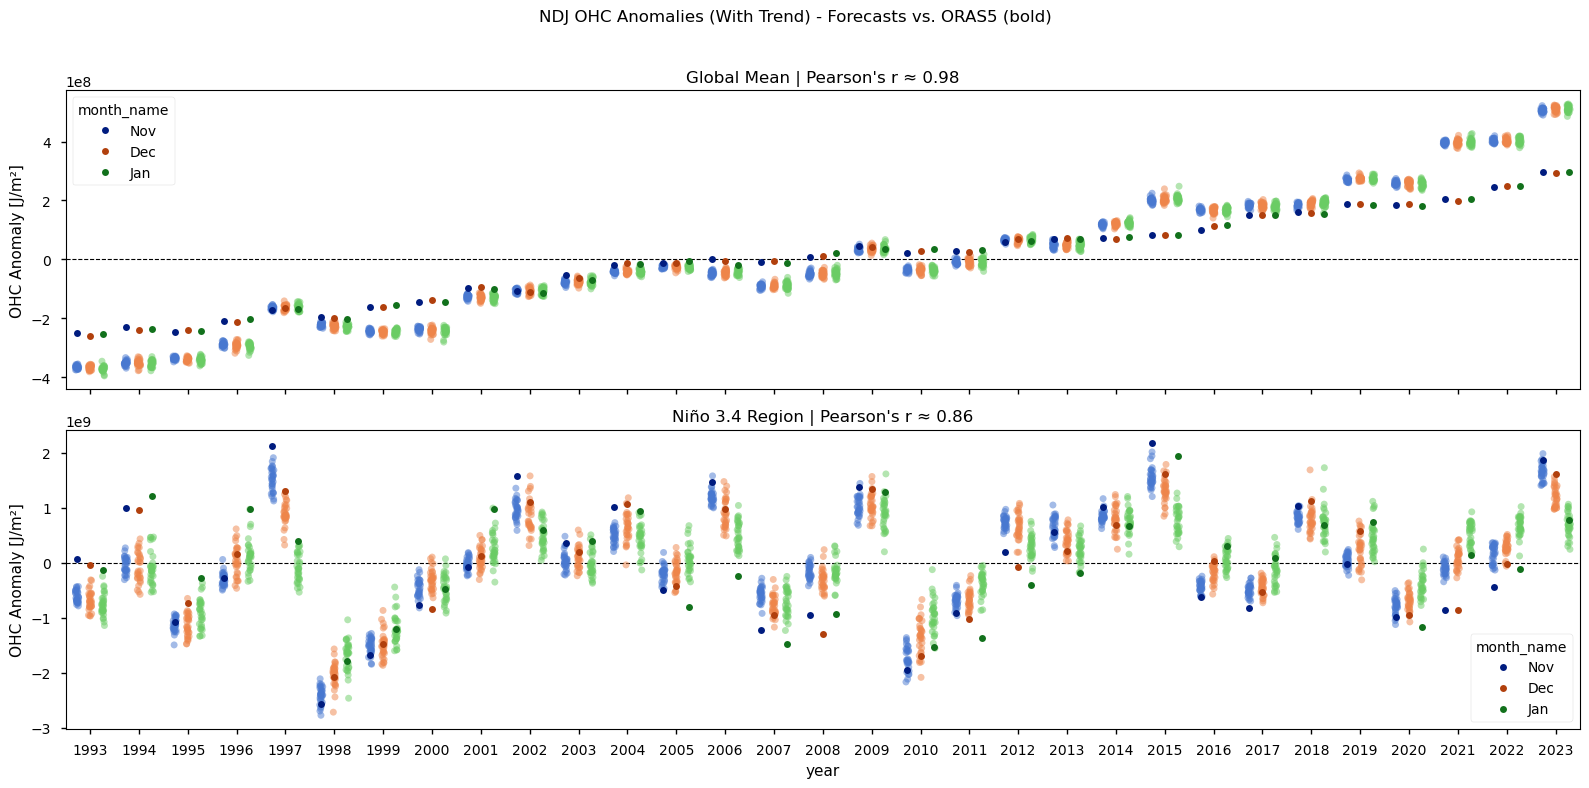

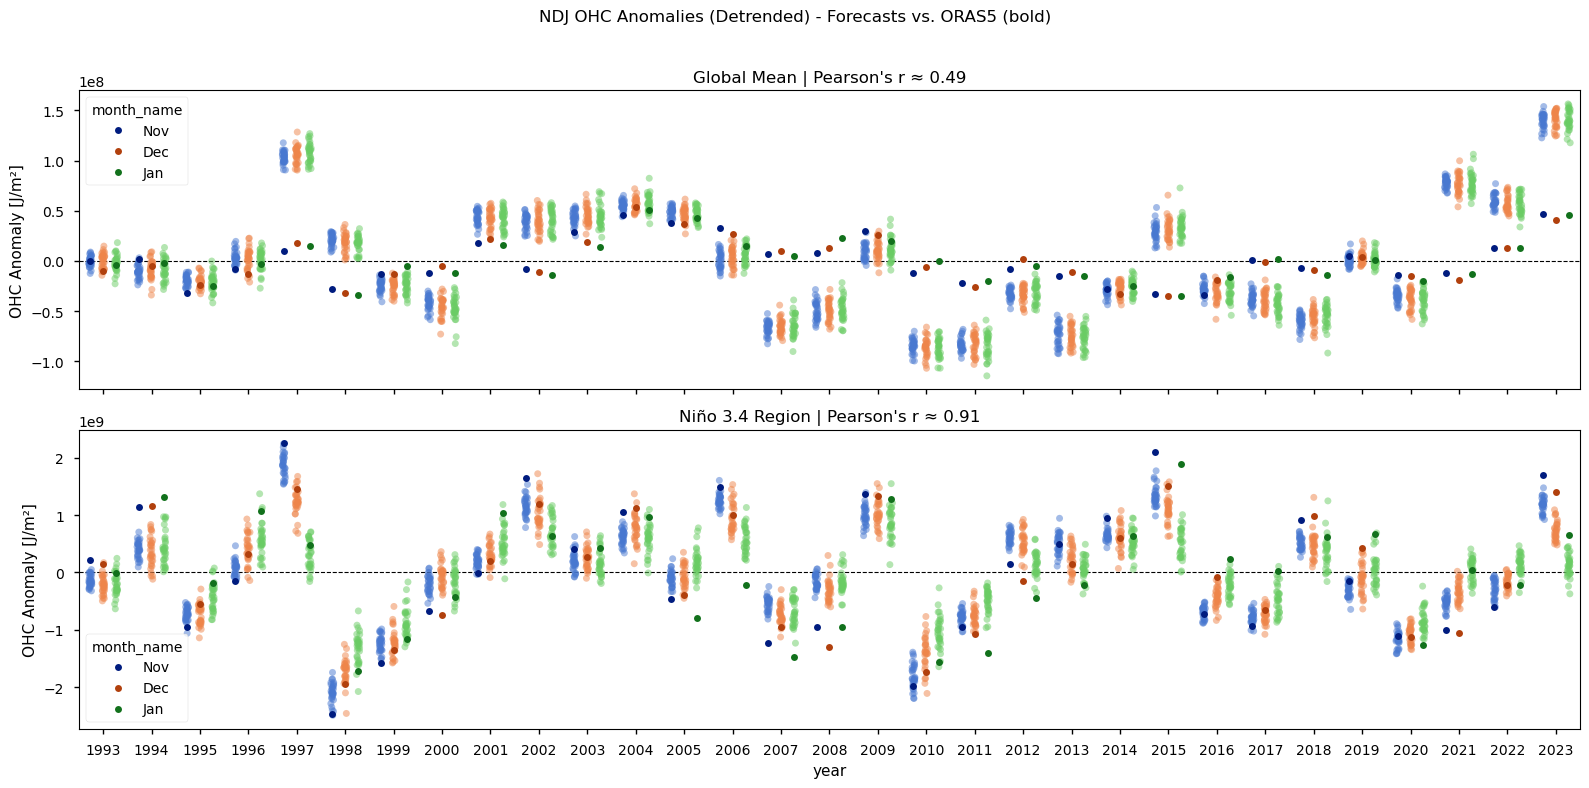

In [5]:
# Time series plotting
def plot_regional_timeseries(seasonal_da, reanalysis_da, nino_box, trend_status=""):
    """Generates a 2-panel plot of global and Nino3.4 time series."""
   
    month_order = [11, 12, 1] 
    month_names = ['Nov', 'Dec', 'Jan']
    month_map = {11: 'Nov', 12: 'Dec', 1: 'Jan'}
    
    # Sort the data 
    seasonal_da = seasonal_da.sel(month=month_order)
    reanalysis_da = reanalysis_da.sel(month=month_order)
    weights = np.cos(np.deg2rad(reanalysis_da['latitude'])).astype(np.float32)
    weights.name = "weights"
    
    # Perform the mean operations 
    s_global_lazy = seasonal_da.weighted(weights).mean(['latitude', 'longitude'])
    r_global_lazy = reanalysis_da.weighted(weights).mean(['latitude', 'longitude'])
    s_nino_lazy = seasonal_da.sel(**nino_box).weighted(weights).mean(['latitude', 'longitude'])
    r_nino_lazy = reanalysis_da.sel(**nino_box).weighted(weights).mean(['latitude', 'longitude'])

   
    corr_global = xr.corr(r_global_lazy, s_global_lazy.mean('realization'), dim='year').mean('month').compute().item()
    corr_nino = xr.corr(r_nino_lazy, s_nino_lazy.mean('realization'), dim='year').mean('month').compute().item()
    
    del s_global_lazy, r_global_lazy, s_nino_lazy, r_nino_lazy
    gc.collect()

    s_global = seasonal_da.weighted(weights).mean(['latitude', 'longitude'])
    r_global = reanalysis_da.weighted(weights).mean(['latitude', 'longitude'])
    s_nino = seasonal_da.sel(**nino_box).weighted(weights).mean(['latitude', 'longitude'])
    r_nino = reanalysis_da.sel(**nino_box).weighted(weights).mean(['latitude', 'longitude'])
    
    # --- Plotting ---
    fig, axs = plt.subplots(2, 1, figsize=(16, 8), sharex=True)
    plt.suptitle(f"NDJ OHC Anomalies ({trend_status}) - Forecasts vs. ORAS5 (bold)")

    # Global Plot 
    s_global_df = s_global.to_dataframe(name='anomaly').reset_index() 
    r_global_df = r_global.to_dataframe(name='anomaly').reset_index()

     # --- Create and order the categorical month name column ---
    s_global_df['month_name'] = pd.Categorical(s_global_df['month'].map(month_map), categories=month_names, ordered=True)
    r_global_df['month_name'] = pd.Categorical(r_global_df['month'].map(month_map), categories=month_names, ordered=True)
    
    sns.stripplot(data=s_global_df, x="year", y="anomaly", hue="month_name", dodge=True, alpha=.5, legend=False, palette="muted", ax=axs[0])
    sns.stripplot(data=r_global_df, x="year", y="anomaly", hue="month_name", ax=axs[0], palette="dark", dodge=True)
    axs[0].set_title(f"Global Mean | Pearson's r ≈ {corr_global:.2f}")
    axs[0].axhline(0, color="k", lw=0.8, ls="--")
    axs[0].set_ylabel("OHC Anomaly [J/m²]")

    # Nino 3.4 Plot
    s_nino_df = s_nino.to_dataframe(name='anomaly').reset_index()
    r_nino_df = r_nino.to_dataframe(name='anomaly').reset_index()
    s_nino_df['month_name'] = pd.Categorical(s_nino_df['month'].map(month_map), categories=month_names, ordered=True)
    r_nino_df['month_name'] = pd.Categorical(r_nino_df['month'].map(month_map), categories=month_names, ordered=True)
    
    sns.stripplot(data=s_nino_df, x="year", y="anomaly", hue="month_name", dodge=True, alpha=.5, legend=False, palette="muted", ax=axs[1])
    sns.stripplot(data=r_nino_df, x="year", y="anomaly", hue="month_name", ax=axs[1], palette="dark", dodge=True)
    axs[1].set_title(f"Niño 3.4 Region | Pearson's r ≈ {corr_nino:.2f}")
    axs[1].axhline(0, color="k", lw=0.8, ls="--")
    axs[1].set_ylabel("OHC Anomaly [J/m²]")
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
 

# --- Execute plotting ---
ds_s_trend_ndj = ds_seasonal_trend['sohtc300_anomalies']
ds_r_trend_ndj = ds_reanalysis_trend['sohtc300_anomalies']

ds_s_trend_ndj = ds_s_trend_ndj.chunk({'year': -1, 'month': -1, 'realization': 1})
ds_r_trend_ndj = ds_r_trend_ndj.chunk({'year': -1, 'month': -1})
 
plot_regional_timeseries(ds_s_trend_ndj, ds_r_trend_ndj, nino_box, trend_status="With Trend")

gc.collect();

ds_s_ndj = ds_seasonal['sohtc300_anomalies']
ds_r_ndj = ds_reanalysis['sohtc300_anomalies']

ds_s_ndj = ds_s_ndj.chunk({'year': -1, 'month': -1, 'realization': 1})
ds_r_ndj = ds_r_ndj.chunk({'year': -1, 'month': -1})

plot_regional_timeseries(ds_s_ndj, ds_r_ndj, nino_box, trend_status="Detrended")

gc.collect();

#### Figure 2  
Annual time series of reanalysis and forecast anomalies according to calendar month. The single dots with a stronger color shows the reanalysis data, while the more lightly colored plot clouds show the seasonal forecasts (one dot per realization). The upper two rows show the anomalies in the original time-series for the global and Niño3.4 area, while the lower panels show the detrended data. The title provides the Pearson correlation coefficient of the area averaged anomalies. Note that the y-axis range varies.

The time series of globally averaged OHC anomalies clearly shows a strong positive trend over the 1993-2023 period. This warming trend is present in both the ORAS5 reanalysis and the Météo-France System 9 seasonal forecasts. Because this predictable, long-term signal could artificially inflate skill scores, the linear trend is removed from both datasets for all subsequent heatwave and skill analyses. The detrended time series shows the interannual variability, such as the strong El Niño events, more clearly.

(seasonal_seasonal-monthly-ocean_extremes-detection_q07:seasonal_ohc:section-3)= 
### 3. Model Performance vs. Reanalysis


This section directly compares the model's OHC and heatwave representation against the reanalysis.

#### i) Correlation of OHC Anomalies

/data/common/miniforge3/envs/wp3/lib/python3.12/site-packages/dask/array/numpy_compat.py:58: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


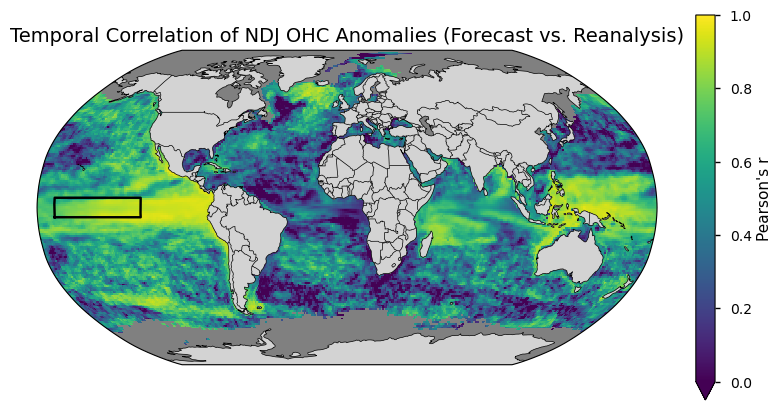

In [6]:
del  ds_seasonal_trend, ds_reanalysis_trend, ds_r_trend_ndj,ds_s_trend_ndj

# Correlation of OHC Anomalies
correlation_map = xr.corr(
    ds_reanalysis['sohtc300_anomalies'].sel(month=months_to_do),
    ds_seasonal['sohtc300_anomalies'].sel(month=months_to_do).mean('realization'),
    dim='year'
).mean('month').compute() 

plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.Robinson())
cmap = plt.get_cmap('viridis')
cmap.set_bad(alpha=0.0)
correlation_map.plot(
    ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1,
    cbar_kwargs={'label': "Pearson's r"}
)
setup_map_plot(ax)
ax.set_title("Temporal Correlation of NDJ OHC Anomalies (Forecast vs. Reanalysis)", fontsize=14)
plt.show()
gc.collect();

##### Figure 3
Map plot showing the temporal correlation coefficients (Pearson's) between the forecast ensemble mean and the reanalysis 1993-2023 NDJ OHC every valid grid box.

#### ii) Comparison of Heatwave Representation
- **Heatwaves** are defined as monthly anomalies exceeding a 90th percentile threshold. The thresholds are caclulated from a three-month centered moving window.
    - For reanalysis data, the threshold is calculated from the time series at each grid point.
    - For the seasonal forecast, the threshold is calculated across all years and all ensemble members.


Computing p90 thresholds...


/data/common/miniforge3/envs/wp3/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1617: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


p90 thresholds computed.


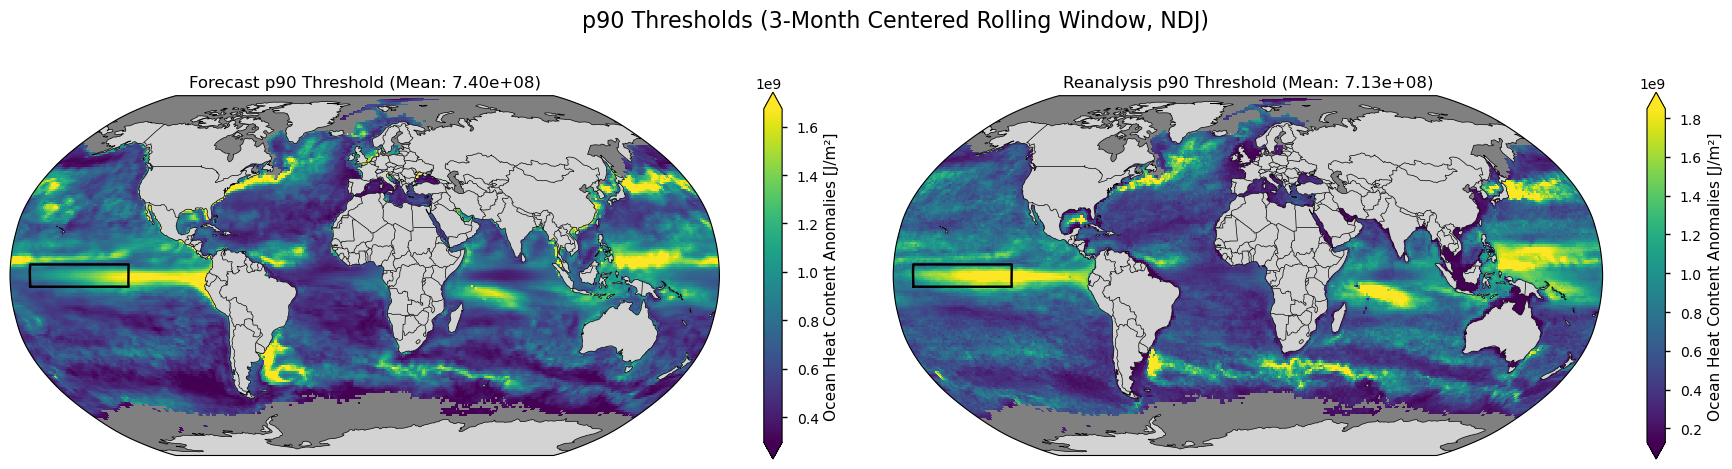

Computing Seasonal Forecast mask (31 realizations)...
Computing Reanalysis mask...


In [9]:
def calculate_heatwave_masks(ds_seasonal, ds_reanalysis, comask):
    """
    Calculates binary heatwave masks based on the 90th percentile
    of a 3-month rolling window (NDJ).
    
    The masks are converted to int8 to save memory, using -99 as
    the fill value for NA (land/ice).
    """
    
    # --- 1. Get the anomaly DataArrays ---
    da_r = ds_reanalysis['sohtc300_anomalies'].chunk({**spatial_chunks, **time_chunks})
    da_s = ds_seasonal['sohtc300_anomalies'].chunk({**spatial_chunks, 'realization': 1, **time_chunks})

    # --- 2. Calculate 3-month rolling p90 thresholds ---

    # Reanalysis:
    p90_nov_r_lazy = da_r.sel(month=[10, 11, 12]).quantile(0.9, dim=['month', 'year'], method="higher")
    p90_dec_r_lazy = da_r.sel(month=[11, 12, 1]).quantile(0.9, dim=['month', 'year'], method="higher")
    p90_jan_r_lazy = da_r.sel(month=[12, 1, 2]).quantile(0.9, dim=['month', 'year'], method="higher")
    
    p90_r_lazy = xr.concat([p90_nov_r_lazy, p90_dec_r_lazy, p90_jan_r_lazy], dim='month')
    p90_r_lazy['month'] = [11, 12, 1]

    # Seasonal:
    p90_nov_s_lazy = da_s.sel(month=[10, 11, 12]).quantile(0.9, dim=['month', 'year', 'realization'])
    p90_dec_s_lazy = da_s.sel(month=[11, 12, 1]).quantile(0.9, dim=['month', 'year', 'realization'])
    p90_jan_s_lazy = da_s.sel(month=[12, 1, 2]).quantile(0.9, dim=['month', 'year', 'realization'])
    
    p90_s_lazy = xr.concat([p90_nov_s_lazy, p90_dec_s_lazy, p90_jan_s_lazy], dim='month')
    p90_s_lazy['month'] = [11, 12, 1]

    # --- 3. Compute the p90 thresholds ---
    print("Computing p90 thresholds...")
    (p90_r, p90_s) = dask_compute(p90_r_lazy, p90_s_lazy)
    print("p90 thresholds computed.")

    # --- 4. Plot the computed thresholds ---
    fig, axs = plt.subplots(
        nrows=1, ncols=2, figsize=(18, 5),
        subplot_kw={'projection': ccrs.Robinson()}
    )
    plt.suptitle("p90 Thresholds (3-Month Centered Rolling Window, NDJ)", fontsize=16)
    
    weights = np.cos(np.deg2rad(p90_r['latitude']))
    
    # Calculate the mean *over the 3 NDJ months*
    mean_p90_r = p90_r.mean('month').weighted(weights).mean().item()
    mean_p90_s = p90_s.mean('month').weighted(weights).mean().item()

    # Plot the mean of the 3 NDJ months
    p90_s.mean('month').plot(ax=axs[0], transform=ccrs.PlateCarree(), cmap='viridis', 
                             robust=True, cbar_kwargs={'label': 'Ocean Heat Content Anomalies [J/m²]'})
    axs[0].set_title(f'Forecast p90 Threshold (Mean: {mean_p90_s:.2e})')
    setup_map_plot(axs[0])

    p90_r.mean('month').plot(ax=axs[1], transform=ccrs.PlateCarree(), cmap='viridis', 
                             robust=True, cbar_kwargs={'label': 'Ocean Heat Content Anomalies [J/m²]'})
    axs[1].set_title(f'Reanalysis p90 Threshold (Mean: {mean_p90_r:.2e})')
    setup_map_plot(axs[1])
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()
   
    # Use -99 as the "missing data" flag.
    fill_value = np.int8(-99)
    da_r_ndj = da_r.sel(month=[11, 12, 1])
    da_s_ndj = da_s.sel(month=[11, 12, 1])

    masks_s_list = []
    
    # 6A. Process the largest array (Seasonal Forecast) realization by realization
    print(f"Computing Seasonal Forecast mask ({len(da_s['realization'])} realizations)...")
    
    for r in da_s['realization'].values:
        # Select one realization from the large lazy arrays
        da_s_single = da_s_ndj.sel(realization=r)
        #p90_s_single = p90_s.sel(realization=r)
        
        # Build mask definition for the single realization 
        mask_s_lazy_single = xr.where(da_s_single > p90_s, 1.0, 0.0)
        
        # Apply cleanup steps (still lazy)
        mask_s_lazy_single = mask_s_lazy_single.where(comask.notnull()).fillna(fill_value).astype(np.int8)

        # Compute and store the small result in memory
        mask_s_computed = mask_s_lazy_single.compute()

        heatwave_mask_forecast_slice = mask_s_computed.expand_dims(realization=[r])
        
        masks_s_list.append(heatwave_mask_forecast_slice)
        gc.collect() # Force cleanup immediately after computation

    # Concatenate the final forecast array from the list of NumPy arrays
    heatwave_mask_forecast = xr.concat(masks_s_list, dim='realization')

    
    # Build final mask definition (still lazy Dask arrays)
    mask_r_lazy = xr.where(da_r_ndj > p90_r, 1.0, 0.0)

    # Apply cleanup steps (still lazy)
    mask_r_lazy = mask_r_lazy.where(comask.notnull()).fillna(fill_value).astype(np.int8)
    
    print("Computing Reanalysis mask...")
    heatwave_mask_reanalysis = mask_r_lazy.compute()
 
    # ---  Add encoding info --- -99 treated as Nan
    heatwave_mask_reanalysis.encoding['_FillValue'] = fill_value
    heatwave_mask_forecast.encoding['_FillValue'] = fill_value
    
    return heatwave_mask_forecast, heatwave_mask_reanalysis

# --- Call the function ---
heatwave_mask_forecast, heatwave_mask_reanalysis = calculate_heatwave_masks(
    ds_seasonal,  
    ds_reanalysis,     
    comask
)

# Clean up
gc.collect();

(seasonal_seasonal-monthly-ocean_extremes-detection_q07:fig-lim-map)=
##### Figure 4
Map plot showing the definition of heatwave (or the grid cell threshold to be exceeded) in the OHC anomalies for the seasonal forecasts (left) and the reanalysis (right).

#### iii) Diagnostic Plots for sanity checks. We choose 1997 as our year to inspect the spatial patterns of the anomalies.

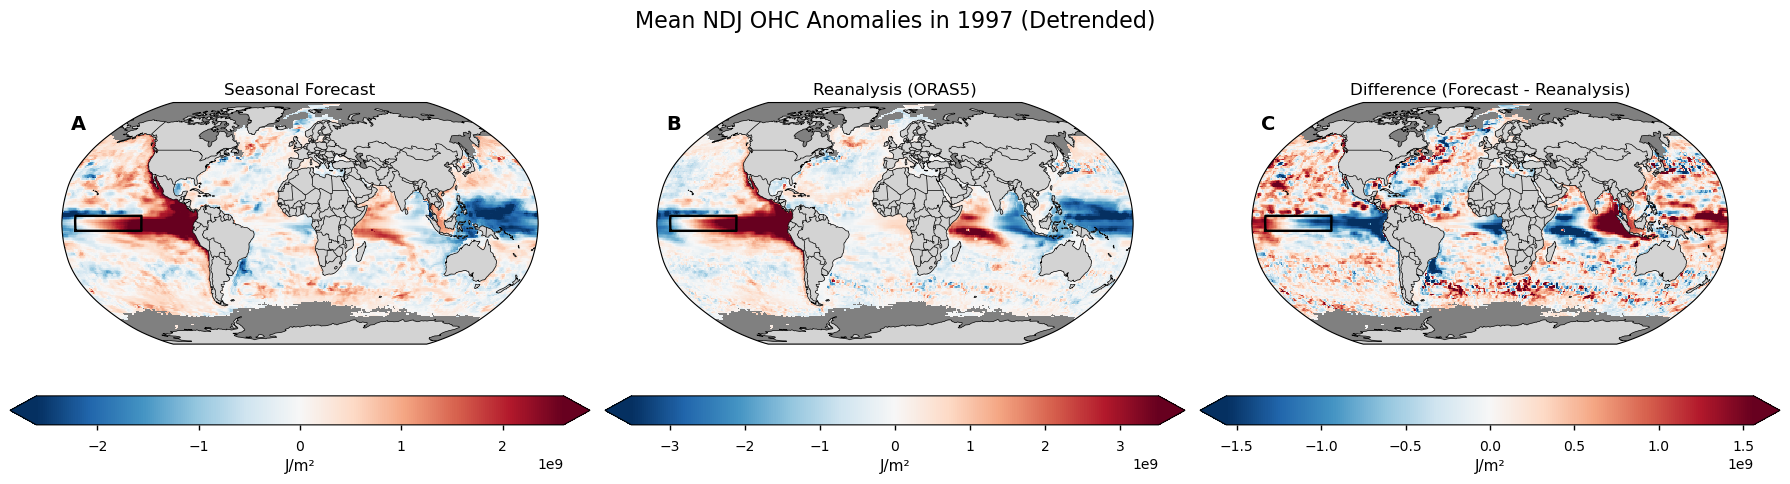

In [10]:
# --- Optional plotting functions for sanity checks ---
def plot_anomaly_maps_for_year(ds_seasonal, ds_reanalysis, year):
    """Visualizes and compares the mean NDJ anomaly maps for a specific year."""
    seasonal_yearly = ds_seasonal['sohtc300_anomalies'].sel(year=year, month=months_to_do).mean(['realization', 'month'])
    reanalysis_yearly = ds_reanalysis['sohtc300_anomalies'].sel(year=year, month=months_to_do).mean('month')
    diff = seasonal_yearly - reanalysis_yearly
    
    # Compute the three small 2D maps and load them into memory.
    seasonal_yearly, reanalysis_yearly, diff = dask_compute(
        seasonal_yearly, reanalysis_yearly, diff
    )
    
    fig, axs = plt.subplots(
        nrows=1, ncols=3, figsize=(18, 5),
        subplot_kw={'projection': ccrs.Robinson()}
    )
    plt.suptitle(f"Mean NDJ OHC Anomalies in {year} (Detrended)", fontsize=16)

    # 1. Get the colormap object
    cmap = plt.get_cmap('RdBu_r')
    # Set 'bad' values to be transparent, allowing the axes background to show.
    cmap.set_bad(alpha=0)

    seasonal_yearly.plot(ax=axs[0], transform=ccrs.PlateCarree(), cmap=cmap, robust=True, cbar_kwargs={'label': 'J/m²',"orientation": "horizontal"})
    reanalysis_yearly.plot(ax=axs[1], transform=ccrs.PlateCarree(), cmap=cmap, robust=True, cbar_kwargs={'label': 'J/m²',"orientation": "horizontal"})
    diff.plot(ax=axs[2], transform=ccrs.PlateCarree(), cmap=cmap, robust=True, cbar_kwargs={'label': 'J/m²',"orientation": "horizontal"})
    
    axs[0].set_title('Seasonal Forecast')
    axs[1].set_title('Reanalysis (ORAS5)')
    axs[2].set_title('Difference (Forecast - Reanalysis)')
    for ab, ax in zip(['A', 'B', 'C'], axs) :
         ax.text(0.02, 0.95, ab, transform=ax.transAxes, 
                        fontsize=14, fontweight='bold', va='top', ha='left')
    
    # style all axes
    for ax in axs.flat:
        setup_map_plot(ax)
    plt.tight_layout(rect=[0, 0.05, 1, 0.9])    
    plt.show() 
  
plot_anomaly_maps_for_year(ds_seasonal, ds_reanalysis, year=1997)


gc.collect();

##### Figure 5   
Map plot showing the mean 1997 NDJ OHC anomalies for the seasonal forecasts (left) and the reanalysis (center), and their difference (right).

(seasonal_seasonal-monthly-ocean_extremes-detection_q07:seasonal_ohc:section-4)=
### 4. Metrics: SEDI, BSS, Accuracy

This section presents the primary skill scores (SEDI, BSS, Accuracy).

#### Symmetric Extremal Dependence Index (SEDI)

SEDI (Ferro & Stephenson 2011, [[3]](https://doi.org/10.1175/WAF-D-10-05030.1)) is calculated using the hit rate (H) and false alarm rate (F), as can be found in a contingency table:

$
  \text{SEDI} = \frac{\log(F) - \log(H) - \log(1-F) + \log(1-H)}{\log(F) + \log(H) + \log(1-F) + \log(1-H)}
  $

To avoid numerical issues, logarithms are computed using a lower bound of $10^{-6}$.

#### The Brier Skill Score (BSS)

The Brier Skill Score (BSS) here compares the forecast's Brier score against the Brier score of using the climatology of the reference data set as a forecast. The climatologically based heatwave forecast is near a 10% chance, but is here calculated explicitly per grid point. The BSS’s upper limit is 1, meanwhile it has no lower limit. Scores above zero indicate a forecast better than climatology. 

#### Accuracy Assessment
Proportion of correct predictions relative to total events. Forecast accuracy was calculated as:
  $
  \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{N}
  $
  where $N$ is the total number of events. Accuracy above a random threshold (e.g., 0.82 for a base rate of 0.1) indicates skill better than chance.

#### Pooling Strategy for Skill Metrics in Map Form

To calculate robust skill scores, data is pooled in different ways depending on the metric. The BSS pools the ensemble members at once, while this is done in a later step for SEDI and Accuracy:

* **For SEDI and Accuracy**: These metrics are calculated from a contingency table (i.e., hits, misses, false alarms, correct rejections). For these every **ensemble member** in every **year** is treated as an independent event. This means we are **pooling across the time dimension (1993-2023) and the ensemble dimension**. This results in a single, robust skill score map that represents the overall performance for that calendar month across the entire period.

* **For the Brier Skill Score (BSS)**: This metric evaluates the performance of a probabilistic forecast compared to a reference forecast (here climatology) for each calendar month and grid cell. The calculation is done in steps:
    1.  First, for each year, the ensemble members are pooled to create a single **forecast probability** for that year (e.g., if 5 of 25 members predict a heatwave, the probability is 0.2).
    2.  The Brier Score is then calculated for each year by comparing that probability to the single observed outcome (`1` or `0`).
    3.  Finally, these annual Brier Scores are averaged across all years to get the final score. The BSS then compares this to the reference score from climatology. 

    

In [11]:
# Function to compute skill score maps

def calculate_skill_maps(forecast_mask, obs_mask, comask):
    """
    Computes skill maps in a two-step process.
    """
    eps = 1e-12 
    fill_value = np.int8(-99)
    
    # --- Step 1: Brier Skill Score  ---
    
    # float32 conversion
    obs_mask_float = obs_mask.where(obs_mask != fill_value).astype(np.float32)
    forecast_mask_float = forecast_mask.where(forecast_mask != fill_value).astype(np.float32)
    
    # Calculate probabilities
    fct_prob = forecast_mask_float.mean('realization')
    climatology_prob = obs_mask_float.mean(dim='year')
    
    # Calculate Brier Scores
    bs_forecast = xs.brier_score(obs_mask_float, fct_prob, dim='year')
    bs_reference = xs.brier_score(obs_mask_float, climatology_prob, dim='year')
    
    # Calculate final BSS
    bss_lazy = xr.where(bs_reference > eps, 1 - (bs_forecast / bs_reference), np.nan)
    
    # --- Execute the BSS calculation ---
    (bss,) = dask_compute(bss_lazy)

    # --- Free memory ---
    del obs_mask_float, forecast_mask_float, fct_prob, climatology_prob
    del bs_forecast, bs_reference, bss_lazy
    gc.collect();

    # --- Step 2: SEDI and Accuracy ---
    
    # lazy and uses int8
    category_map = xr.where(
        obs_mask == 1,
        xr.where(forecast_mask == 1, np.int8(1), np.int8(2)),  # (TP) or (FN)
        xr.where(
            obs_mask == 0,
            xr.where(forecast_mask == 1, np.int8(3), np.int8(4)),  # (FP) or (TN)
            fill_value  # This is the land/ice mask
        )
    ).chunk(obs_mask.chunks)

    # Sum over 'year' and 'realization' to create the maps
    dims_to_sum = ['year', 'realization']
    TP_lazy = (category_map == 1).sum(dim=dims_to_sum, dtype='float32')
    FN_lazy = (category_map == 2).sum(dim=dims_to_sum, dtype='float32')
    FP_lazy = (category_map == 3).sum(dim=dims_to_sum, dtype='float32')
    TN_lazy = (category_map == 4).sum(dim=dims_to_sum, dtype='float32')
    
    # --- Execute the SEDI/Accuracy calculation ---
    (TP, FN, FP, TN) = dask_compute(TP_lazy, FN_lazy, FP_lazy, TN_lazy)

    # --- Calculate final metrics---
    H = TP / (TP + FN + eps)
    F = FP / (FP + TN + eps)
    logH = np.log(np.maximum(H, eps))
    logF = np.log(np.maximum(F, eps))
    log1mH = np.log(np.maximum(1 - H, eps))
    log1mF = np.log(np.maximum(1 - F, eps))
    sedi = (logF - logH - log1mF + log1mH) / (logF + logH + log1mF + log1mH)
    accuracy = (TP + TN) / (TP + TN + FP + FN + eps)

    # --- Combine ---
    skill_ds = xr.Dataset({
        'SEDI': sedi,
        'BSS': bss,  
        'Accuracy': accuracy
    })
    
    # Apply mask 
    skill_ds = skill_ds * comask
    
    return skill_ds

# --- Execute the skill calculation ---
skill_maps = calculate_skill_maps(
    heatwave_mask_forecast, 
    heatwave_mask_reanalysis, 
    comask=comask
)

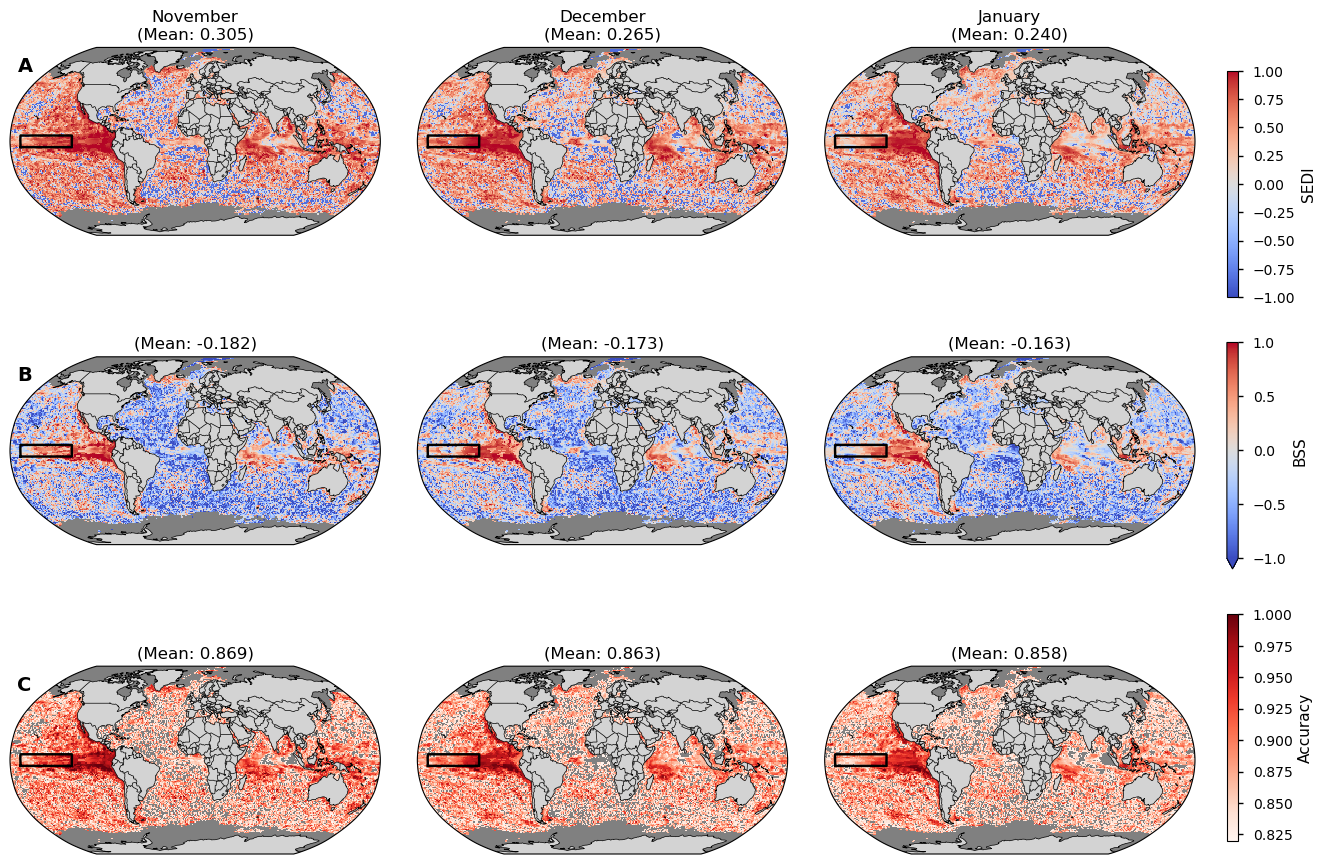

In [12]:
# The main plotting cell with mean values in titles
def plot_skill_maps_with_means(skill_maps, comask):
    fig, axes = plt.subplots(
        nrows=3, ncols=3,
        figsize=(15, 10),
        subplot_kw={'projection': ccrs.Robinson()}
    )
    plt.subplots_adjust(wspace=0.05, hspace=0.2) 

    # dictionaries
    metrics = ['SEDI', 'BSS', 'Accuracy']
    cmaps_dict = {'SEDI': 'coolwarm', 'BSS': 'coolwarm', 'Accuracy': 'Reds'}
    vmins = {'SEDI': -1.0, 'BSS': -1, 'Accuracy': 0.82}
    vmaxs = {'SEDI': 1.0, 'BSS': 1, 'Accuracy': 1.0}
    month_labels = {11:'November', 12:'December', 1:'January'}
    # Define the labels you want for each row
    panel_labels = ['A', 'B', 'C']
    weights = np.cos(np.deg2rad(comask.latitude)) # Define weights once
    for i, metric in enumerate(metrics):
        if metric == 'BSS':
            extend_setting = 'min'
        else:
            extend_setting = 'neither'
            
        for j, month in enumerate(months_to_do):
            ax = axes[i, j]
            
            if j == 0:
                ax.text(0.02, 0.95, panel_labels[i], transform=ax.transAxes, 
                        fontsize=14, fontweight='bold', va='top', ha='left')
            # -------------------------
            
            data_to_plot = skill_maps[metric].sel(month=month)
            
            mean_val = data_to_plot.weighted(weights).mean().compute().item()
            title_with_mean = f"{month_labels[month]}\n(Mean: {mean_val:.3f})"
            
            cmap = plt.get_cmap(cmaps_dict[metric]).copy()
            cmap.set_bad(alpha=0.0)
            
            if metric == 'Accuracy':
                data_to_plot = data_to_plot.where(data_to_plot > vmins['Accuracy'])

            im = data_to_plot.plot(
                ax=ax, transform=ccrs.PlateCarree(),
                cmap=cmap, vmin=vmins[metric], vmax=vmaxs[metric],
                add_colorbar=False
            )
            setup_map_plot(ax)
            
            if i == 0:
                ax.set_title(title_with_mean)
            else:
                ax.set_title(f"\n(Mean: {mean_val:.3f})")

        fig.colorbar(im, ax=axes[i, :], orientation='vertical', label=metric,  
                     extend=extend_setting, fraction=0.05, pad=0.01)
        
        axes[i,0].set_ylabel(f'{panel_labels[i]} {metric}', fontsize=12, fontweight='bold')
    plt.subplots_adjust(left=0.05, right=0.84, bottom=0.05, top=0.95, wspace=0.1, hspace=0.1)
    plt.savefig('metrics_panels_NDJ.png',dpi=300, bbox_inches='tight', pad_inches=0.05)
    plt.show()



plot_skill_maps_with_means(skill_maps, comask)

(seasonal_seasonal-monthly-ocean_extremes-detection_q07:fig-global-maps)=
##### Figure 6 
Skill of Météo-France System-9 NDJ forecasts (initialized October 1st) verified against the ORAS5 reanalysis. Heatwaves are defined as upper 300m ocean heat content (OHC) anomalies exceeding the 90th percentile. Rows show: (A) Symmetric Extremal Dependence Index (SEDI), (B) Brier Skill Score (BSS); and (C) Accuracy. In all maps, red areas indicate positive skill (forecast is better than the reference), while blue areas indicate negative skill.

A key finding of this analysis is a divergence between the metrics in several regions ([](seasonal_seasonal-monthly-ocean_extremes-detection_q07:fig-global-maps)). The SEDI and Accuracy scores ( > 0.82) indicate that the forecast is better than a reference climatology, while BSS is weakly negative in many regions. A negative BSS indicates that the forecast is less skillful than the long-term climatological average, i.e. assuming a ~10% chance of a heatwave everywhere, every year. The plot showing the threshold value for exceeding the 90th percentile in the reanalysis and seasonal forecast ([](seasonal_seasonal-monthly-ocean_extremes-detection_q07:fig-lim-map)) showed that a higher threshold was needed in the seasonal forecasts, indicating that the forecasts have higher temporal variability than the reanalysis. 

This suggests that while the model has the ability to correctly identify many heatwave events (demonstrated in the positive SEDI), it likely forecasts with too much confidence or has a high "false alarm rate," where it predicts heatwaves that don't occur. The BSS penalizes this lack of reliability, while SEDI, which focuses only on the co-occurrence of extreme events, is less sensitive to it.

The highest skill (SEDI > 0.5) is consistently found in the tropical Pacific Ocean. This region's variability is dominated by the El Niño-Southern Oscillation (ENSO), the primary source of seasonal predictability in the climate system. The model successfully captures the OHC anomalies associated with strong ENSO events.
The skill is lower in the mid-to-high latitudes. These regions are governed by more chaotic and faster-moving atmospheric and oceanic processes, making them more difficult to predict months in advance. 

(seasonal_seasonal-monthly-ocean_extremes-detection_q07:seasonal_ohc:section-5)= 
### 5. Contingency Table Analysis
We examine the spatially-pooled contingency tables for each month to better understand the forecast behavior.

In [13]:

def generate_contingency_tables_optimized(forecast_mask, obs_mask, normalize=False):
    """
    Generates a dictionary of contingency tables for each month.
    Uses int8.
    """
      
    # Create boolean fields. 
    obs_yes = (obs_mask == 1)
    obs_no  = (obs_mask == 0)
    fcst_yes = (forecast_mask == 1)
    fcst_no  = (forecast_mask == 0)

    # Define dimensions to sum over
    dims_to_sum = ['year', 'realization', 'latitude', 'longitude']

    TP_by_month = (obs_yes & fcst_yes).groupby('month').sum(dim=dims_to_sum)
    FN_by_month = (obs_yes & fcst_no).groupby('month').sum(dim=dims_to_sum)
    FP_by_month = (obs_no  & fcst_yes).groupby('month').sum(dim=dims_to_sum)
    TN_by_month = (obs_no  & fcst_no).groupby('month').sum(dim=dims_to_sum)

    # Execute all calculations in a single Dask operation
    #print("Computing contingency table")
    TP, FN, FP, TN = dask_compute(TP_by_month, FN_by_month, FP_by_month, TN_by_month)

    raw_tables = {}
    norm_tables = {} if normalize else None

    for month_num in TP['month'].values:
        month_name = pd.to_datetime(month_num, format='%m').month_name()
        
        tp_val = TP.sel(month=month_num).item()
        fn_val = FN.sel(month=month_num).item()
        fp_val = FP.sel(month=month_num).item()
        tn_val = TN.sel(month=month_num).item()
        
        table = pd.DataFrame(
            [[tp_val, fp_val], [fn_val, tn_val]],
            columns=['Event Observed', 'Non-event Observed'],
            index=['Event Forecasted', 'Non-event Forecasted']
        )
        
        table['Total (Forecast)'] = table.sum(axis=1)
        table.loc['Total (Observed)'] = table.sum(axis=0)
        
        raw_tables[month_name] = table.astype(int)
        
        if normalize:
            grand_total = table.loc['Total (Observed)', 'Total (Forecast)']
            if grand_total > 0:
                norm_table = (table / grand_total) * 100
                norm_tables[month_name] = norm_table
            
    if normalize:
        return raw_tables, norm_tables
    else:
        return raw_tables
        

raw_tables, percent_tables = generate_contingency_tables_optimized(
    heatwave_mask_forecast, 
    heatwave_mask_reanalysis, 
    normalize=True
)

print("\n--- Contingency Tables in Percent (%) ---")
for month_name, table in percent_tables.items():
    print(f"\n{month_name}:")
    # Format to 2 decimal places with a '%' sign
    display(table.style.format("{:.1f}%"))


--- Contingency Tables in Percent (%) ---

November:



December:



January:


For all Novembers (one month leadtime, or 1-2 months, to be exact), when the model predicts a marine heatwave, that prediction is correct 32% of the time (Precision). Conversely, the False Discovery Rate is 68%, meaning roughly two-thirds of forecasted heatwaves did not materialize in observations. The predictive skill degrades slightly with lead time; by January (three month leadtime), the probability of a forecasted heatwave actually occurring drops to 26%.

Regarding the capture of observed events (Hit Rate), the model successfully anticipates 33% of the heatwaves that occurred in November. This capability decreases marginally to 30% in December and 27% in January. Overall, the system demonstrates an ability to capture approximately one-third of heatwave events at a one-month lead time, though users must be mindful of the high false alarm ratio.

(seasonal_seasonal-monthly-ocean_extremes-detection_q07:seasonal_ohc:section-6)= 
### 6. Annual Variability and ENSO Influence
We now investigate the year-to-year skill for each month and its potential connection to ENSO.

In [14]:
def calculate_annual_skill_and_rates(forecast_mask, obs_mask):
    """
    Calculates all annual time series in a two-step process.
    Step 1: Computes float-based metrics (BSS, MHW Occ.). 
    We here use the teoretical BSSref of 0.1
    Step 2: Clears memory, then computes intiger-based metrics (SEDI, Rates)
    """
    
    fill_value = np.int8(-99)
    weights = np.cos(np.deg2rad(obs_mask.latitude))
    weights.name = "weights"

    # ---BSS in float ---
    obs_mask_float = obs_mask.where(obs_mask != fill_value).astype(np.float32)
    fcst_mask_float = forecast_mask.where(forecast_mask != fill_value).astype(np.float32)

    mhw_occurrence_lazy = obs_mask_float.weighted(weights).mean(['latitude', 'longitude']
                                                               ) * 100
    
    fct_prob = fcst_mask_float.mean('realization')
    bs_forecast = xs.brier_score(obs_mask_float, fct_prob, dim=['latitude', 'longitude'], 
                                 weights=weights)
    bs_reference_theoretical = 0.1 * (1 - 0.1)  # 0.09
    bss_theoretical_lazy = 1 - (bs_forecast / bs_reference_theoretical)

    mhw, bss = dask_compute(mhw_occurrence_lazy, bss_theoretical_lazy)

    # --- free memory ---
    del obs_mask_float, fcst_mask_float, mhw_occurrence_lazy
    del fct_prob, bs_forecast, bss_theoretical_lazy
    gc.collect();
    # -------------------

    # SEDI & Rates from the int8 arrays
    category_map = xr.where(
        obs_mask == 1,
        xr.where(forecast_mask == 1, np.int8(1), np.int8(2)),  # (TP) or (FN)
        xr.where(
            obs_mask == 0,
            xr.where(forecast_mask == 1, np.int8(3), np.int8(4)),  # (FP) or (TN)
            fill_value
        )
    ).chunk(obs_mask.chunks)

    dims_to_sum = ['realization', 'latitude', 'longitude']
    TP_ym_lazy = (category_map == 1).groupby('year').sum(dim=dims_to_sum, dtype='float32') 
    FN_ym_lazy = (category_map == 2).groupby('year').sum(dim=dims_to_sum, dtype='float32')
    FP_ym_lazy = (category_map == 3).groupby('year').sum(dim=dims_to_sum, dtype='float32')
    TN_ym_lazy = (category_map == 4).groupby('year').sum(dim=dims_to_sum, dtype='float32')

    # The int-based computations
    tp, fn, fp, tn = dask_compute(TP_ym_lazy, FN_ym_lazy, FP_ym_lazy, TN_ym_lazy)
    
    # --- free mem ---
    del category_map, TP_ym_lazy, FN_ym_lazy, FP_ym_lazy, TN_ym_lazy
    gc.collect();
    # -------------------

    # --- STEP 3: Combine results -------
    eps = 1e-12
    H = tp / (tp + fn + eps) # Hit Rate
    F = fp / (fp + tn + eps) # False Alarm Rate
    FN_rate = fn / (tp + fn + eps) # Miss Rate
    TN_rate = tn / (fp + tn + eps) # Correct Rejection Rate
    
    logH, logF = np.log(np.maximum(H, eps)), np.log(np.maximum(F, eps))
    log1mH, log1mF = np.log(np.maximum(1 - H, eps)), np.log(np.maximum(1 - F, eps))
    sedi = (logF - logH - log1mF + log1mH) / (logF + logH + log1mF + log1mH)
    
    # --- combine and format ---
    month_map = {11: 'November', 12: 'December', 1: 'January'}
    
    df_list = []
    all_metrics = {
        'MHW_Occurrence': mhw, 'BSS': bss, 'SEDI': sedi,
        'True_Pos': H, 'False_Pos': F, 'False_Neg': FN_rate, 'True_Neg': TN_rate
    }

    for name, da in all_metrics.items():
        df = da.to_dataframe(name='val').reset_index()
        df['metric'] = name + '_' + df['month'].map(month_map)
        df_list.append(df)
        
    final_df = pd.concat(df_list)
    pivot_df = final_df.pivot_table(index='year', columns='metric', values='val')
    
    return pivot_df


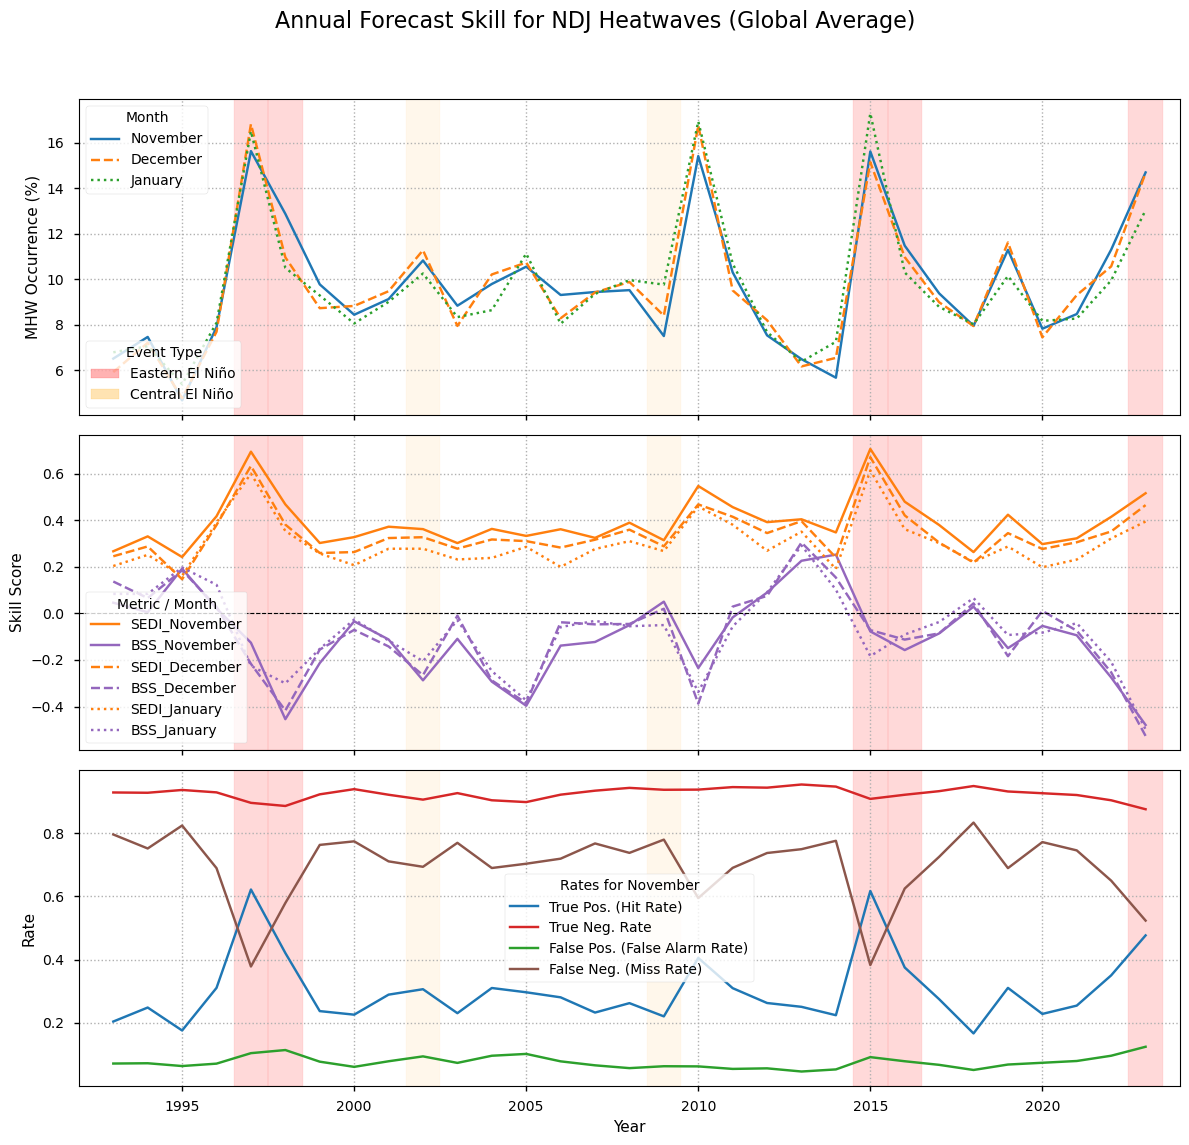

In [15]:
def plot_jacox_style_figure(df, enso_years, title, month_to_plot='November'):
    """
    Creates a 3-panel figure similar to the one in Jacox et al. (2022),
    including a split legend on the top panel for line metrics and ENSO events.
    """
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12, 12), 
                                        sharex=True)
    fig.suptitle(title, fontsize=16) 

    months = ['November', 'December', 'January']
    styles = {'November': '-', 'December': '--', 'January': ':'}
    
    # --- Panel A: MHW Occurrence---
    for month in months:
        ax1.plot(df.index, df[f'MHW_Occurrence_{month}'], linestyle=styles[month], 
                 label=month)
    ax1.set_ylabel("MHW Occurrence (%)")
    ax1.grid(True, linestyle=':')
    
    line_handles, line_labels = ax1.get_legend_handles_labels()
    leg1 = ax1.legend(handles=line_handles, labels=line_labels, 
                      title="Month", loc='upper left')
    ax1.add_artist(leg1) 

    enso_colors = {'Eastern': 'red', 'Central': 'orange'}
    patch_handles = []
    if 'Eastern' in enso_years.values():
        patch_handles.append(Patch(color=enso_colors['Eastern'], alpha=0.3, 
                                   label='Eastern El Niño'))
    if 'Central' in enso_years.values():
        patch_handles.append(Patch(color=enso_colors['Central'], alpha=0.3, 
                                   label='Central El Niño'))

    if patch_handles:
        ax1.legend(handles=patch_handles, title="Event Type", loc='lower left')

    # --- Panel B: Skill Scores ---
    for month in months:
        ax2.plot(df.index, df[f'SEDI_{month}'], color='C1', 
                 linestyle=styles[month], label=f'SEDI_{month}')
        
        if f'BSS_Theoretical_{month}' in df.columns:
            ax2.plot(df.index, df[f'BSS_Theoretical_{month}'], color='C4', 
                     linestyle=styles[month], label=f'BSS_Theoretical_{month}')
        elif f'BSS_{month}' in df.columns: 
             ax2.plot(df.index, df[f'BSS_{month}'], color='C4', 
                      linestyle=styles[month], label=f'BSS_{month}')
             
    ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)
    ax2.set_ylabel("Skill Score")
    ax2.legend(title="Metric / Month", loc='best')
    ax2.grid(True, linestyle=':')
    
    # --- Panel C: Contingency Rates ---
    ax3.plot(df.index, df[f'True_Pos_{month_to_plot}'], color='C0', 
             label='True Pos. (Hit Rate)')
    ax3.plot(df.index, df[f'True_Neg_{month_to_plot}'], color='C3', 
             label='True Neg. Rate')
    ax3.plot(df.index, df[f'False_Pos_{month_to_plot}'], color='C2', 
             label='False Pos. (False Alarm Rate)')
    ax3.plot(df.index, df[f'False_Neg_{month_to_plot}'], color='C5', 
             label='False Neg. (Miss Rate)')
    ax3.set_ylabel("Rate")
    ax3.set_xlabel("Year")
    ax3.legend(title=f"Rates for {month_to_plot}", loc='best')
    ax3.grid(True, linestyle=':')
    
    # Add ENSO shading to all panels
    enso_alpha = {'Eastern': 0.15, 'Central': 0.08}
    for ax in [ax1, ax2, ax3]:
        ax.set_xlim(df.index.min() - 1, df.index.max() + 1)
        for year_str, enso_type in enso_years.items():
            year = int(year_str)
            if year in df.index:
                ax.axvspan(year - 0.5, year + 0.5, color=enso_colors[enso_type], 
                           alpha=enso_alpha[enso_type], 
                           zorder=0, label='_nolegend_') 

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# 1. Define ENSO years (as before)
enso_years = {
    '1997': 'Eastern', '1998': 'Eastern', # The 97-98 event
    '2002': 'Central', # The 02-03 event
    '2009': 'Central', # The 09-10 event
    '2015': 'Eastern', '2016': 'Eastern', # The 15-16 event
    '2023': 'Eastern', '2024': 'Eastern' # The recent 23-24 event
}

# 2. Run GLOBAL calculation and plot
global_jacox_df = calculate_annual_skill_and_rates(
    heatwave_mask_forecast, 
    heatwave_mask_reanalysis
)
plot_jacox_style_figure(
    global_jacox_df, 
    enso_years,
    title="Annual Forecast Skill for NDJ Heatwaves (Global Average)"
)


(seasonal_seasonal-monthly-ocean_extremes-detection_q07:fig-global-ts-in)=
#### Figure 7 
Annual time series of globally-averaged forecast performance for the NDJ season. The upper panel (A) depticts marine heatwave (MHW) occurrence each year (%). Panel B shows the SEDI and the BSS in NDJ averaged over the valid ocean region. Panel C shows the contingency table components, the False or True Positives and Negatives each year. The figure is similar to Extended Data Fig. 5 in Jacox et. al. 2022, [[1]](https://doi.org/10.1038/s41586-022-04573-9). Occurrence of El Niño is shown with a red (Eastern type) or yellow (Central type, Modoki) background color.

To explore regional predictability, we focus on two key areas: the Niño 3.4 region (5°N-5°S, 170-120°W). The Niño 3.4 region was choosen as it represents the tropical pacific and the ENSO. 

--- Running Case Study: Niño 3.4 Region ---


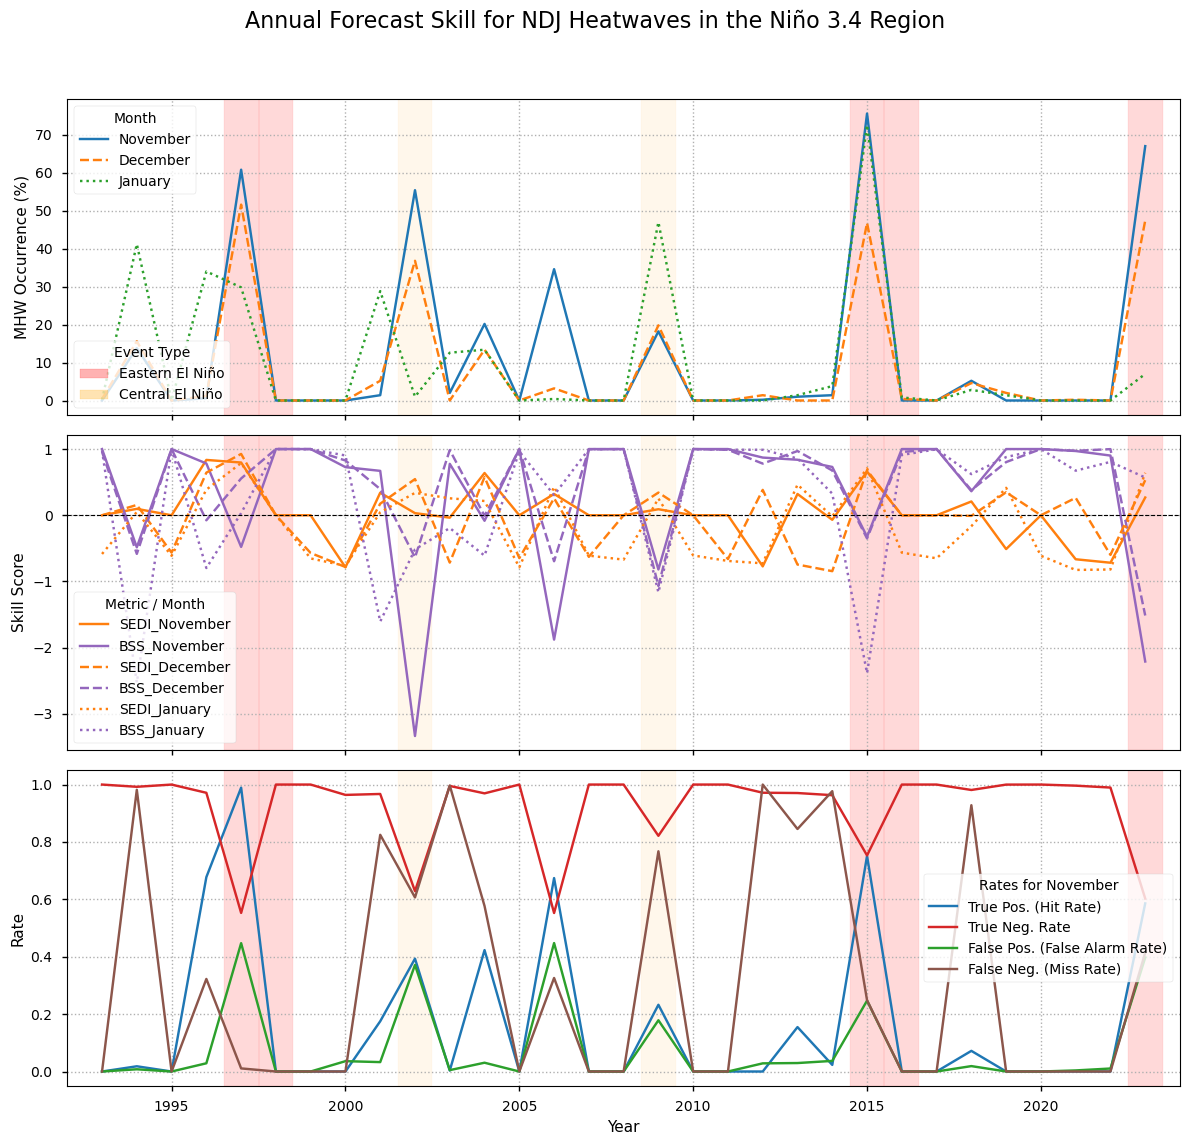

In [16]:
print("--- Running Case Study: Niño 3.4 Region ---")

# 1. Select the data for the Niño 3.4 region 
nino34_mask_forecast = heatwave_mask_forecast.sel(**nino_box)
nino34_mask_reanalysis = heatwave_mask_reanalysis.sel(**nino_box) 


nino34_jacox_df = calculate_annual_skill_and_rates(
    nino34_mask_forecast, 
    nino34_mask_reanalysis
)
plot_jacox_style_figure(
    nino34_jacox_df, 
    enso_years,
    title="Annual Forecast Skill for NDJ Heatwaves in the Niño 3.4 Region"
)

# 4. Clean up large intermediate masks
del nino34_mask_forecast, nino34_mask_reanalysis
gc.collect();

(seasonal_seasonal-monthly-ocean_extremes-detection_q07:fig-nino-ts)=
#### Figure 8 
As in Figure [](seasonal_seasonal-monthly-ocean_extremes-detection_q07:fig-global-ts-in), but for the Niño 3.4 region.

An analysis of global year-to-year variability in SEDI and BSS ([](seasonal_seasonal-monthly-ocean_extremes-detection_q07:fig-global-ts-in)) reveals a divergence in skill metrics. The SEDI scores (orange lines) remain positive and notably peak during major Eastern El Niño events (e.g., 1997-98, 2015-16). This indicates that the forecast system is highly effective at signal detection; it successfully identifies high-risk periods during these major climate drivers. Conversely, the BSS (purple lines)—which measures probabilistic skill—often deteriorates during these same events. This negative correlation suggests that the single-model system suffers from overconfidence. While the model correctly predicts the risk of a heatwave (high SEDI), the probability it assigns is less accurate. This is a common limitation of single-model systems, where the ensemble spread is insufficient to represent true uncertainty. Transitioning to a multi-model ensemble would likely improve reliability for decision-making by increasing that spread.

In contrast, the skill within the Niño 3.4 region ([](seasonal_seasonal-monthly-ocean_extremes-detection_q07:fig-nino-ts)) is much higher and more reliable. Although the time-series exhibits higher variability, which is expected a dynamic and smaller region, the BSS is consistently positive, approaching 1.0 during the major 1997-98 and 2015-16 events. The high SEDI scores further confirm the model's ability to capture these extremes. This confirms that the probabilistic forecasts are both skillful and reliable regarding ENSO, the primary driver of seasonal predictability. 

(seasonal_seasonal-monthly-ocean_extremes-detection_q07:seasonal_ohc:section-7)= 
### 7. Summary of Results

This study compares the Météo-France System-9 seasonal forecasts against the ORAS5 ocean reanalysis for forecasts initialized around October 1st for mean monthly values in November, December, and January. The analysis focused on the forecast skill for extreme upper OHC events (anomalies >90th percentile) after removing long-term trends from both datasets. We assess skill at lead times of 1–3 months using metrics such as the Symmetric Extremal Dependence Index (SEDI) and the Brier Skill Score (BSS). The metrics considered follow  Jacox et al. (2022) [[1]](https://doi.org/10.1038/s41586-022-04573-9), however, in this work we look at OHC and not SST. It should be noted that this evaluation and use-case considers a single ocean reanalysis as a reference dataset. Using an ensemble of observational datasets could provide a more robust assessment. 


The forecast system demonstrates clear, positive skill in detecting events. The Symmetric Extremal Dependence Index (SEDI) is positive globally and spikes during major Eastern El Niño events (e.g., 1997-98, 2015-16). This is corroborated by the contingency rate analysis ([](seasonal_seasonal-monthly-ocean_extremes-detection_q07:fig-global-ts-in) panel C), which shows the True Positive (Hit) Rate increasing dramatically in these years, confirming the model successfully captures the El Niño signal.

The system provides a valuable tool for anticipation of NDJ upper ocean heatwaves, with its utility and reliability being highest in ENSO-dominated regions. However, outside this region the Brier Skill Score (BSS) is often negative, indicating that the forecast probabilites are less reliable than the static climatological reference forecast (always a 10% chance). This might indicate that the model has too little ensemble spread in these regions. This makes the forecast a good "heads-up" warning for high-risk periods, but for higher reliability outside the main ENSO regions a multi-model system might be useful. 

## ℹ️ If you want to know more

### Key resources
We thank B-Open for their support in setting up this notebook with cached data, so that it can run smoothly on the servers at hand. 

Code libraries used:
[C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [B-Open](https://www.bopen.eu/), where xesmf is used within *c3s_eqc_automatic_quality_control* for regridding. Additionally, a code snippet from [ocean-regrid](https://github.com/COSIMA/ocean-regrid/tree/master) was used to provide the proper cell edge coordinates for the ORCA025 tripolar grid. The skill scores and accuracy were quantified using *xskillscore*, further *dask*, *xarray*, *pandas*, *matplotlib*, *seaborn*, *numpy*, and *cartopy* were used for computations and plotting.

### References

[[1]](https://doi.org/10.1038/s41586-022-04573-9) Jacox, M. G., Alexander, M. A., Amaya, D., Becker, E., Bograd, S. J., Brodie, S., Hazen, E. L., Pozo Buil, M., & Tommasi, D. (2022). Global seasonal forecasts of marine heatwaves. Nature, 604(7906), 486–490.

[[2]](https://doi.org/10.1007/S00382-021-06101-3) McAdam, R., Masina, S., Balmaseda, M., Gualdi, S., Senan, R., & Mayer, M. (2022). Seasonal forecast skill of upper-ocean heat content in coupled high-resolution systems. Climate Dynamics, 58(11–12), 3335–3350.

[[3]](https://doi.org/10.1175/WAF-D-10-05030.1) Ferro, C. A. T., & Stephenson, D. B. (2011). Extremal Dependence Indices: Improved Verification Measures for Deterministic Forecasts of Rare Binary Events. Weather and Forecasting, 26(5), 699–713. 
